In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "python")

import respy as rp
import numpy as np

from auxiliary import plot_average_wages_over_time
from auxiliary import plot_choice_probabilities
from auxiliary import plot_distibution_wages

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Robinson Crusoe economy

The `respy` package provides several example models that can be used to explore selected issues in the structural microeconometrics. We focus on the `robinson` example, which allows for quick iterations. All example models share the same interface so they can be easily swapped in and out of any analysis.

In [2]:
options_base = yaml.safe_load(
    open(os.environ["ROBINSON_SPEC"] + "/robinson.yaml", "r")
)

params_base = pd.read_csv(
    open(os.environ["ROBINSON_SPEC"] + "/robinson.csv", "r")
)
params_base.set_index(["category", "name"], inplace=True)

Let's look at the parameterization of the model, the specified options and a simulated dataset. 

In [3]:
params_base

value
category       name                       
delta          delta                 0.950
wage_fishing   exp_fishing           0.070
nonpec_fishing constant             -0.100
nonpec_hammock constant              1.046
shocks_sdcorr  sd_fishing            0.010
               sd_hammock            0.010
               corr_hammock_fishing  0.000

In [4]:
options_base

{'estimation_draws': 100,
 'estimation_seed': 100,
 'estimation_tau': 0.001,
 'interpolation_points': -1,
 'n_periods': 5,
 'simulation_agents': 1000,
 'simulation_seed': 132,
 'solution_draws': 100,
 'solution_seed': 456,
 'covariates': {'constant': '1'}}

Now we are ready to simulate a sample.

In [11]:
simulate = rp.get_simulate_func(params_base, options_base)
df = simulate(params_base)

We first look at the general structure of the data.

In [6]:
df.head()

Experience_Fishing  Shock_Reward_Fishing  \
Identifier Period                                             
0          0                        0              1.007197   
           1                        1              0.981015   
           2                        2              0.998980   
           3                        3              0.989253   
           4                        4              1.010431   

                   Meas_Error_Wage_Fishing  Shock_Reward_Hammock  \
Identifier Period                                                  
0          0                             1              0.010305   
           1                             1              0.010596   
           2                             1             -0.003797   
           3                             1             -0.011702   
           4                             1             -0.002176   

                   Meas_Error_Wage_Hammock   Choice      Wage  Discount_Rate  \
Identifier Period                                                              
0          0                             1  fishing  1.007197           0.95   
           1                             1  fishing  1.052147           0.95   
           2                             1  fishing  1.149101           0.95   
           3                             1  fishing  1.220419           0.95   
           4                             1  fishing  1.336932           0.95   

                   Nonpecuniary_Reward_Fishing  Wage_Fishing  \
Identifier Period                                              
0          0                              -0.1      1.007197   
           1                              -0.1      1.052147   
           2                              -0.1      1.149101   
           3                              -0.1      1.220419   
           4                              -0.1      1.336932   

                   Flow_Utility_Fishing  Value_Function_Fishing  \
Identifier Period                                                 
0          0                   0.907197                4.747606   
           1                   0.952147                4.022193   
           2                   1.049101                3.230306   
           3                   1.120419                2.282845   
           4                   1.236932                1.236932   

                   Continuation_Value_Fishing  Nonpecuniary_Reward_Hammock  \
Identifier Period                                                            
0          0                         4.042536                        1.046   
           1                         3.231627                        1.046   
           2                         2.296006                        1.046   
           3                         1.223607                        1.046   
           4                         0.000000                        1.046   

                   Wage_Hammock  Flow_Utility_Hammock  Value_Function_Hammock  \
Identifier Period                                                               
0          0                NaN              1.056305                4.742931   
           1                NaN              1.056596                3.903085   
           2                NaN              1.042203                3.063422   
           3                NaN              1.034298                2.111715   
           4                NaN              1.043824                1.043824   

                   Continuation_Value_Hammock  
Identifier Period                              
0          0                         3.880659  
           1                         2.996304  
           2                         2.127598  
           3                         1.134123  
           4                         0.000000

We can study the resulting choice patterns.

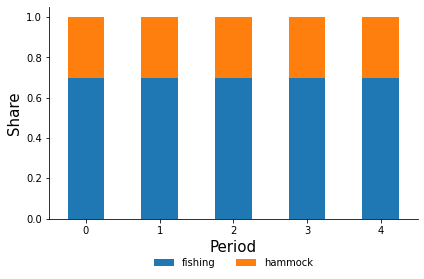

In [7]:
plot_choice_probabilities(df)

We can look at the distirbution of wages.

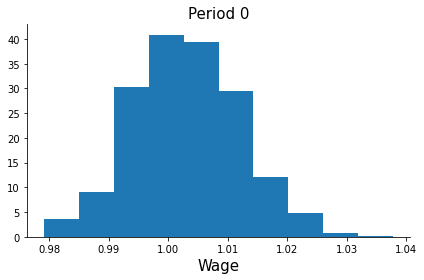

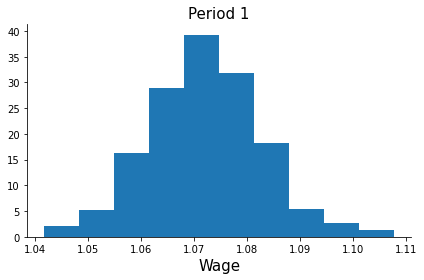

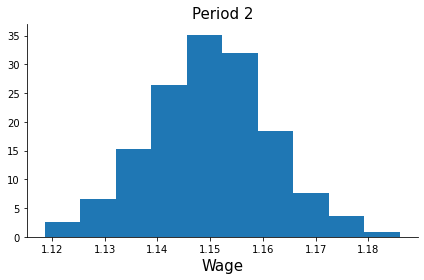

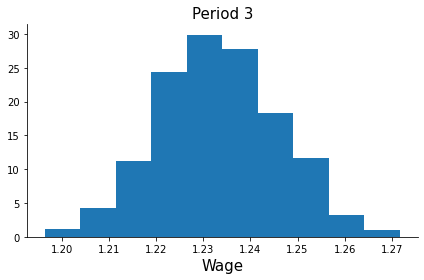

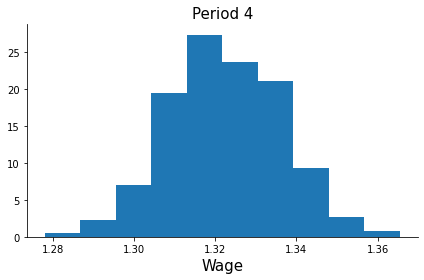

In [10]:
plot_distibution_wages(df)

We can look at average wages over time.

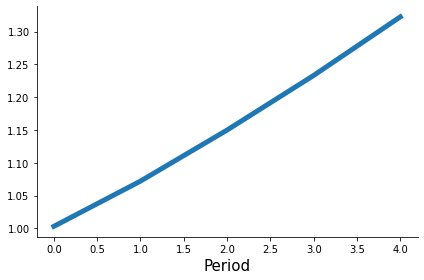

In [9]:
plot_average_wages_over_time(df)